## Setup

In [ ]:
import sys
from _path import workdir
sys.path.append(workdir)
print(sys.path)

['c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\python312.zip', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\DLLs', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys', '', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\vince\\OneDrive - The Chinese University of Hong Kong\\python projects\\py binary orbit\\paper_QPE2005\\..', 'c:\\Users\\vince\\OneDrive - The Chinese University of Hong Kong\\python projects\\py binary orbit\\paper_QPE2005\\..']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from src.util.constants import G, msun, c
from src.orbit.mapping.orbele import itmap
from src.orbit.numerical.dyn_tide_fast import binary_dyn_tide_num_eff
from src.orbit.empirical.WDBH_EMRI import rWD, rtide, wf, olapf

## 2.5PN effect

## Compare 1: IMRI

### Initial parameters

In [ ]:
mWD = 0.5*msun
mBH = 1.e5*msun
Torb = 9.*3600
a_fixed = (G*(mBH+mWD)*(Torb/2/np.pi)**2)**(1./3)
rt = rtide(mWD,mBH)
rt_factor = 3.5

w_list1, olap_list1, ell_list1, m_list1 = [wf(mWD)], [olapf(mWD,0.5)], [2], [2]
w_list2, olap_list2, ell_list2, m_list2 = [], [], [], []

m1, r1 = mWD, rWD(mWD)
m2, r2 = mBH, 2*G*mBH/c**2


q10 = np.zeros(len(w_list1)*len(ell_list1)*len(m_list1))
q20 = np.zeros(len(w_list2)*len(ell_list2)*len(m_list2))

ntot = 1500
sec = 20

# filename0 = 'data_IMRI_2_5PN_vlong/rp=%.1f_data.txt'%rt_factor0
filename = 'data_plot_numerical/rp=%.3f_data.txt'%rt_factor

In [ ]:
print(wf(mWD)*Torb/2/np.pi)

1763.742550147829


### Iterative mapping

In [ ]:
rp = rt_factor*rt
a0, e0, ga0 = a_fixed, 1-rp/a_fixed, 0.

itsol = itmap()
itsol.par = {'m1':m1, 'r1':r1, 'm2':m2, 'r2':r2\
                ,'a0':a0, 'e0':e0, 'ga0':ga0}
itsol.flag_tide_reaction = True
itsol.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1)
itsol.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)
    
itsol.map(ntot)


itsol_25pn = itmap()
itsol_25pn.par = itsol.par
itsol_25pn.flag_1pn = False
itsol_25pn.flag_redshift = False
itsol_25pn.flag_dq_cal = False
itsol_25pn.flag_2_5pn = True
itsol_25pn.flag_tide_reaction = True
itsol_25pn.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1)
itsol_25pn.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)

itsol_25pn.map(ntot)

itsol_25pn_vrydq = itmap()
itsol_25pn_vrydq.par = itsol.par
itsol_25pn_vrydq.flag_1pn = False
itsol_25pn_vrydq.flag_redshift = False
itsol_25pn_vrydq.flag_dq_cal = False
itsol_25pn_vrydq.flag_2_5pn = True
itsol_25pn_vrydq.flag_tide_reaction = True
itsol_25pn_vrydq.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1)
itsol_25pn_vrydq.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)

itsol_25pn_vrydq.map2(ntot)

itsol_25pn_notide = itmap()
itsol_25pn_notide.par = itsol.par
itsol_25pn_notide.flag_1pn = False
itsol_25pn_notide.flag_redshift = False
itsol_25pn_notide.flag_dq_cal = False
itsol_25pn_notide.flag_2_5pn = True
itsol_25pn_notide.flag_tide_reaction = False
itsol_25pn_notide.get_mode_1(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1)
itsol_25pn_notide.get_mode_2(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)

itsol_25pn_notide.map2(ntot)

nlist = [x for x in range(ntot)]

### Numerical calculation

In [ ]:
nsec = ntot//sec
npart = np.array([(i+1)*nsec for i in range(sec)])
print(npart)

[  75  150  225  300  375  450  525  600  675  750  825  900  975 1050
 1125 1200 1275 1350 1425 1500]


#### Comment this cell to  skip integration

In [ ]:
# rp = rt_factor*rt
# a0, e0, ga0 = a_fixed, 1-rp/a_fixed, 0.

# t0 = 0.
# y0 = np.array([])

# f0 = open(filename,'w')
# f0.close()
# f0 = open(filename,'a')
# np.savetxt(f0,[],header='%10s %10s %10s'%('N_orb','E_n','E_{n dyn}'))

# for i in range(len(npart)):
#     nsol_25pn = binary_dyn_tide_num_eff()

#     mo1 = nsol_25pn.gen_mode(w=w_list1,olap=olap_list1,ell=ell_list1,m=m_list1)
#     mo2 = nsol_25pn.gen_mode(w=w_list2,olap=olap_list2,ell=ell_list2,m=m_list2)
    
#     parnum = {'a0':a0, 'e0':e0, 'ga0':ga0,\
#             'm1':m1, 'r1':r1, 'm2':m2, 'r2':r2,\
#             'q1':q10, 'q2':q20}
    
#     P0K = 2*np.pi*np.sqrt(a0**3/G/(m1+m2))
#     tend = npart[i]*P0K

#     if i > 0:
#         nsol_25pn.t0 = t0
#         nsol_25pn.y0 = y0

#     nsol_25pn.odemethod = 'DOP853'
#     nsol_25pn.par = parnum
#     nsol_25pn.mo1, nsol_25pn.mo2 = mo1, mo2
#     nsol_25pn.atol_factor = 1.e-10
#     nsol_25pn.rtol = 1.e-10
#     nsol_25pn.pn1 = False
#     nsol_25pn.redshift = False
#     nsol_25pn.pn2_5 = True
#     nsol_25pn.tide_reaction = True

#     nsol_25pn.solve(tend)

#     nsol_25pn.find_energy()

#     nsol_25pn.find_q_eq()
    
#     # Save data
#     nsol_en_dyn = np.zeros(len(nsol_25pn.r))
#     for k in range(len(nsol_25pn.r)):
#         nsol_en_dyn[k] = G*(m1/m2)*(m1+m2)/r1*np.sum(np.abs(nsol_25pn.q1[:,k]- nsol_25pn.q1_eq[:,k])**2)\
#                     + G*(m2/m1)*(m1+m2)/r2*np.sum(np.abs(nsol_25pn.q2[:,k]- nsol_25pn.q2_eq[:,k])**2)

#     np.savetxt(f0, np.column_stack((nsol_25pn.t[::20]/P0K, nsol_25pn.en_mode[::20], nsol_en_dyn[::20]))\
#             , fmt=['%10.4e','%10.4e','%10.4e'])
#     f0.write("\n")

#     t0 = nsol_25pn.t[-1]
#     y0 = nsol_25pn.ysol[:,-1]

#     print(len(nsol_25pn.en))

# f0.close()

## Output plots

#### Load old data

In [ ]:
n_num, en_mode, en_dyn = np.loadtxt(filename,skiprows=1,unpack=True)
Eorb0 = G*(m1+m2)/2/a_fixed

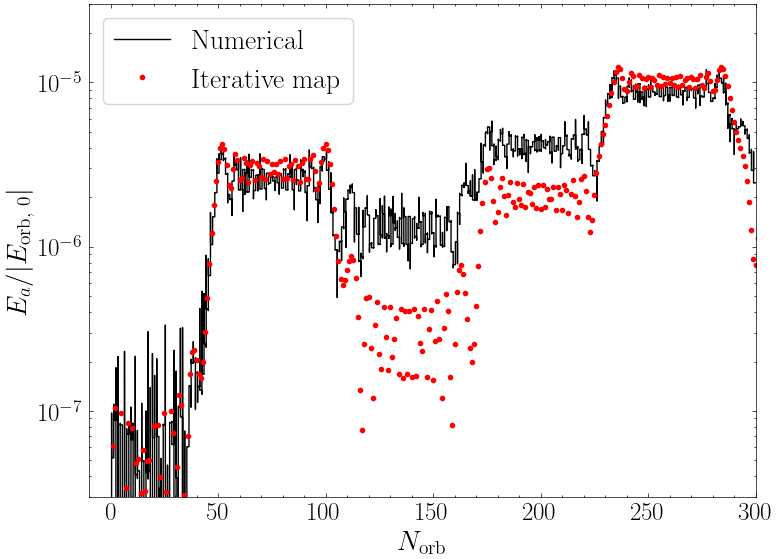

In [ ]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.style.use('science')
plt.plot(n_num, np.abs(en_dyn/Eorb0), 'k-', label=r'Numerical')
plt.plot(nlist, np.abs((itsol_25pn_vrydq.E1n+itsol_25pn_vrydq.E2n)/Eorb0), 'r.', label=r'Iterative map')
plt.xlabel(r'$N_\text{orb}$',fontsize=20)
plt.ylabel(r'$E_a/|E_\text{orb, 0}|$',fontsize=20)
plt.yscale('log')
plt.legend(frameon = True, fontsize=20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlim([-10,300])
plt.ylim([3e-8,3e-5])
plt.savefig("num.pdf", format="pdf")
plt.show()
plt.close()